In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [2]:
# 2. Load Dataset
df1 = pd.read_csv('exercise.csv')
df2 = pd.read_csv('calories.csv')

In [6]:
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
# 3. Combine two Dataframe
df = pd.concat([df1, df2], axis=1)

In [10]:
# 3. Combine two Dataframe
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   User_ID     15000 non-null  int64  
 9   Calories    15000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1.1+ MB


In [12]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,1.497736e+07,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,2.872851e+06,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000116e+07,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,1.247419e+07,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,1.499728e+07,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,1.744928e+07,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,1.999965e+07,314.000000


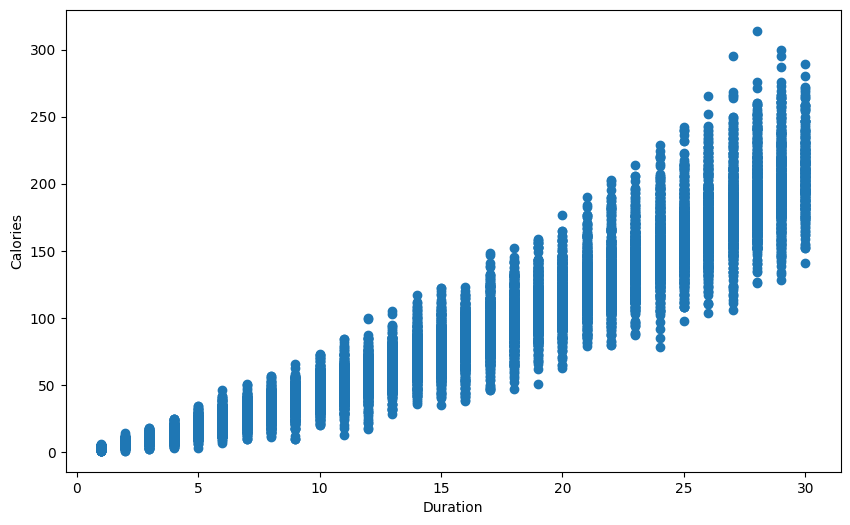

In [13]:
# Visualize of the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()

In [14]:
# checking missing data
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
User_ID       0
Calories      0
dtype: int64

In [15]:
# gender value counts
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [16]:
# column names convert to lower case
df.columns = df.columns.str.lower()

In [17]:
df.head()

,user_id,gender,age,height,weight,duration,heart_rate,body_temp,user_id,calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [18]:
# Encode categorical variables (replace male with 0 and female with 1)
df.replace({'gender': {'male':0, 'female':1}}, inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_16360\4198836268.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'gender': {'male':0, 'female':1}}, inplace=True)


In [19]:
df.head()

,user_id,gender,age,height,weight,duration,heart_rate,body_temp,user_id,calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [20]:
# Split the data into features and target
# Drop unnecessary columns (e.g., user_id, calories)
X = df.drop(['calories','user_id'], axis=1)
y = df['calories']

In [21]:
X.head() 

,gender,age,height,weight,duration,heart_rate,body_temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [22]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: calories, dtype: float64

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_test.shape

((12000, 7), (3000, 7))

In [27]:
# Evaluation
# - show_scores(model, x_train, x_test, y_train, y_test)
# - score_dataset()
# - y_preds = model.predict()
# - y_probs = model.predict_proba()

def show_scores(model, x_train, x_test, y_train, y_test):
  # Calculate the model's predictions
  train_preds = model.predict(x_train)
  test_preds = model.predict(x_test)

  # Evaluate the model's performance using various metrics
  mae_train = mean_absolute_error(y_train, train_preds)
  mae_test = mean_absolute_error(y_test, test_preds)
  mse_train = mean_squared_error(y_train, train_preds)
  mse_test = mean_squared_error(y_test, test_preds)
  r2_train = r2_score(y_train, train_preds)
  r2_test = r2_score(y_test, test_preds)

  # Print the results
  print("Model:", model.__class__.__name__)
  print("-" * 30)
  print("Training set:")
  print("- RMSE:", np.sqrt(mse_train))
  print("- MAE:", mae_train)
  print("- R2 Score:", r2_train)
  print("-" * 30)
  print("Test set:")
  print("- RMSE:", np.sqrt(mse_test))
  print("- MAE:", mae_test)
  print("- R2 Score:", r2_test)

# Fit the train data into models
compare the aaccuracy or other metrics

In [28]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [29]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [30]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [31]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
# lasso
from sklearn.linear_model import Lasso
lasso = Lasso()

In [33]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()

In [35]:
# ElasticNet
from sklearn.linear_model import ElasticNet
en = ElasticNet()

In [36]:
models = [xgb, rf, dt, lr, lasso, ridge, en]
model_names = [model.__class__.__name__ for model in models]
for model in models:
    model.fit(X_train, y_train)
    show_scores(model, X_train, X_test, y_train, y_test)
    print("\n")

Model: XGBRegressor
------------------------------
Training set:
- RMSE: 1.27767624327929
- MAE: 0.9447468986184492
- R2 Score: 0.9995777219604748
------------------------------
Test set:
- RMSE: 2.1375116634132594
- MAE: 1.4981198125282924
- R2 Score: 0.9988678909361673


Model: RandomForestRegressor
------------------------------
Training set:
- RMSE: 1.1026082940010926
- MAE: 0.6792483333333333
- R2 Score: 0.99968551541172
------------------------------
Test set:
- RMSE: 2.707269097571696
- MAE: 1.7208033333333337
- R2 Score: 0.9981839235233457


Model: DecisionTreeRegressor
------------------------------
Training set:
- RMSE: 0.0
- MAE: 0.0
- R2 Score: 1.0
------------------------------
Test set:
- RMSE: 5.2920695384698035
- MAE: 3.41
- R2 Score: 0.9930605929079108


Model: LinearRegression
------------------------------
Training set:
- RMSE: 11.267023767032818
- MAE: 8.306790197742506
- R2 Score: 0.9671621074066676
------------------------------
Test set:
- RMSE: 11.48894014915288

In [39]:
# Model Parameters
xgb.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)>

# Code Analysis

In [40]:
# Model Saving
joblib.dump(xgb, "calories_model.pkl")
model = joblib.load("calories_model.pkl")

# Model Parameters
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [41]:
# Data Export 
df.to_csv('calories_data.csv', index=False)